# **MACHINE LEARNING MODEL** 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Dermatology.csv')

### DATA_PRE-PROCESSING:

#### CHECKING NULL VALUES: 

In [3]:
data.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

#### HANDLING CORRUPTED VALUES:

In [4]:
data.loc[data['Age']=="?","Age"]=0

In [5]:
data[["Age"]]=data[["Age"]].astype("int64")

In [6]:
data.loc[data["Age"]==0,"Age"]=data["Age"].median()

### FEATURE SELECTION:

#### CHECKING THE HIGHLY CO-RELATED FEATURES:

<AxesSubplot:>

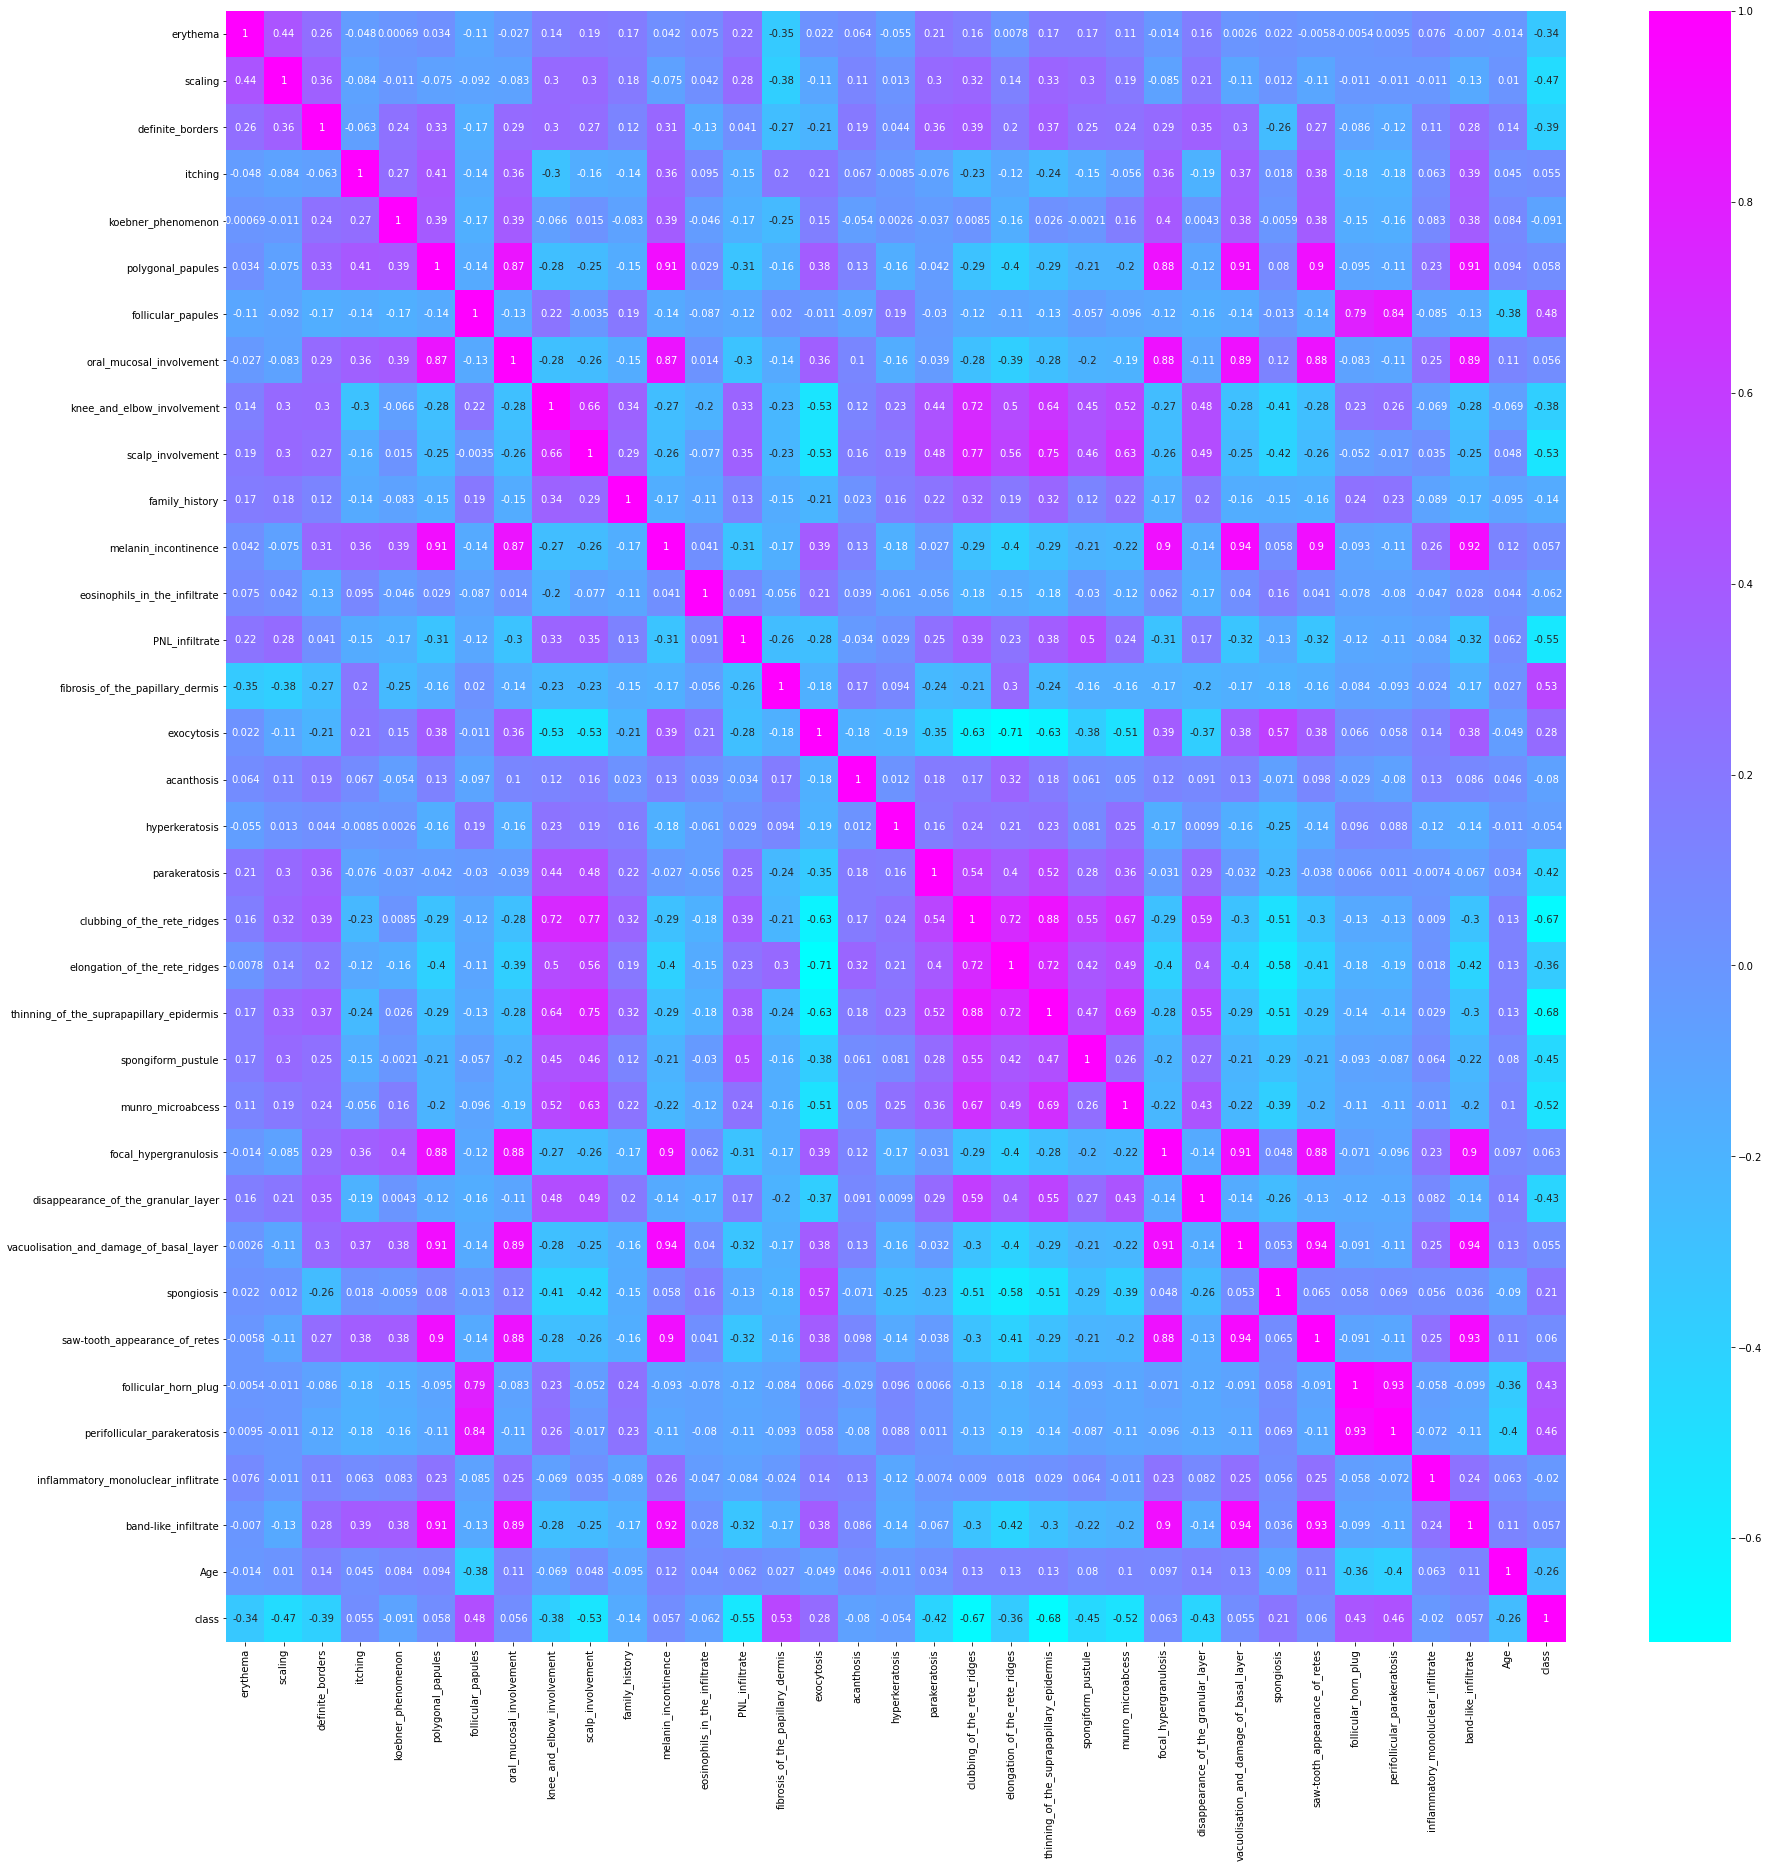

In [7]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),cmap="cool",annot=True)

### DROPPING HIGHLY CO-RELATED FEATURES:

In [8]:
data.drop(['polygonal_papules','melanin_incontinence',
           'focal_hypergranulosis','vacuolisation_and_damage_of_basal_layer',
           'saw-tooth_appearance_of_retes','band-like_infiltrate'],axis=1,inplace=True)

### MODEL CREATION:

In [9]:
x=data.drop(["class"],axis=1)
y=data["class"]

### BALANCING THE DATA:

In [10]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()
print("unbalanced data:  ",Counter(y))
x_sm,y_sm=sm.fit_resample(x,y)
print("balanced data:    :",Counter(y_sm))

unbalanced data:   Counter({1: 112, 3: 72, 2: 61, 5: 52, 4: 49, 6: 20})
balanced data:    : Counter({2: 112, 1: 112, 3: 112, 5: 112, 4: 112, 6: 112})


### TRAIN-TEST SPLIT:

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,random_state=42,test_size=0.25)

### MODEL BUILDING

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [13]:
y_hat = dt.predict(x_test)

In [14]:
acc=accuracy_score(y_test,y_hat)
acc

0.9583333333333334

### CHECKING WHETHER DATA IS FULLY TRAINED OR NOT

In [15]:
from sklearn.metrics import classification_report,accuracy_score,f1_score,confusion_matrix
y_pred=dt.predict(x_train)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        81
           2       1.00      1.00      1.00        91
           3       1.00      1.00      1.00        82
           4       1.00      1.00      1.00        81
           5       1.00      1.00      1.00        89
           6       1.00      1.00      1.00        80

    accuracy                           1.00       504
   macro avg       1.00      1.00      1.00       504
weighted avg       1.00      1.00      1.00       504



In [16]:
pd.crosstab(y_train,y_pred)

col_0,1,2,3,4,5,6
class,,,,,,
1,81,0,0,0,0,0
2,0,91,0,0,0,0
3,0,0,82,0,0,0
4,0,0,0,81,0,0
5,0,0,0,0,89,0
6,0,0,0,0,0,80


* As from classification report given above we can conclude that this model is fit for this data because it is 100%training the   data.
* And confusion_matrix is the proof that it does not doing any false prediction.
* Hence we can move further with this algorithm and do prediction on our data.

### PREDICTION ON TEST DATA:

In [17]:
y_hat=dt.predict(x_test)
y_hat

array([4, 2, 4, 6, 1, 4, 1, 2, 5, 2, 2, 5, 5, 4, 1, 1, 5, 6, 5, 3, 1, 6,
       2, 5, 6, 2, 4, 6, 3, 2, 3, 6, 6, 1, 2, 5, 3, 3, 1, 6, 6, 1, 2, 2,
       5, 4, 6, 2, 1, 4, 6, 4, 1, 5, 3, 6, 5, 1, 1, 2, 2, 2, 3, 1, 4, 6,
       6, 3, 6, 5, 1, 1, 1, 2, 5, 2, 5, 2, 4, 6, 3, 1, 5, 3, 6, 3, 4, 2,
       1, 4, 4, 5, 6, 6, 1, 3, 1, 4, 1, 6, 1, 4, 2, 4, 6, 4, 4, 4, 3, 3,
       3, 2, 1, 4, 2, 3, 4, 3, 5, 1, 3, 5, 6, 4, 1, 2, 2, 4, 6, 5, 3, 5,
       3, 4, 1, 4, 6, 1, 3, 5, 3, 6, 4, 3, 6, 2, 3, 3, 5, 3, 1, 6, 2, 1,
       6, 6, 6, 5, 4, 3, 2, 2, 3, 6, 6, 4, 5, 3], dtype=int64)

### CHECKING CLASSIFICATION REPORT:

In [18]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        31
           2       0.78      1.00      0.88        21
           3       1.00      0.97      0.98        30
           4       0.96      0.87      0.92        31
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        32

    accuracy                           0.96       168
   macro avg       0.96      0.96      0.96       168
weighted avg       0.97      0.96      0.96       168



### USING RANDOM FOREST ENSEMBLE TECHNIQUE TO IMPROVE THE MODEL PERFORMANCE

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rfc=RandomForestClassifier(n_estimators=450)

In [21]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=450)

In [22]:
y_prediction=rfc.predict(x_test)

In [23]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.95      1.00      0.98        21
           3       1.00      1.00      1.00        30
           4       1.00      0.97      0.98        31
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        32

    accuracy                           0.99       168
   macro avg       0.99      0.99      0.99       168
weighted avg       0.99      0.99      0.99       168



In [24]:
pd.crosstab(y_test,y_prediction)

col_0,1,2,3,4,5,6
class,,,,,,
1,31,0,0,0,0,0
2,0,21,0,0,0,0
3,0,0,30,0,0,0
4,0,1,0,30,0,0
5,0,0,0,0,23,0
6,0,0,0,0,0,32


* AS IT CAN BE SEEN THAT ONLY SKIN DISORDER TYPE 4(chronic_dermatitis) DOING SOME FALSE PREDICTIONS AND OTHER PREDICTIONS ARE 100%   TRUE.

### CONCLUSION:

* ACCORDING TO OUR BUSINESS CASE PROBLEM, THE RECALL SCORE SHOULD BE HIGH, AND ACC. TO THE CLASSIFICATION REPORT, RECALL SCORE   IS 100% FOR 5 SKIN DISORDERS.
* MEANS OVERALL OUR MODEL IS PERFORMING GOOD FOR THIS PROBLEM.
* AND WE CAN CONCLUDE FROM OUR ACCURACY THAT OUR MODEL IS DOING 99% OF TRUE PREDICTIONS.